

### Сортування вставками (Insertion Sort)

Алгоритм сортування вставками працює, ітеруючись по масиву та вставляючи кожен елемент на правильну позицію у вже відсортованій частині масиву.

Найкращий випадок (масив вже відсортований): У цьому випадку, коли ми переходимо до наступного елемента, він вже знаходиться на правильній позиції відносно попередніх. Внутрішній цикл (пошук правильної позиції) не виконується. Таким чином, для кожного з $n$ елементів виконується лише одна операція порівняння. Отже, загальна кількість операцій пропорційна $n$, і асимптотична складність становить O(n).

 Середній випадок: У середньому, коли ми розглядаємо $i$-тий елемент, ймовірно, нам доведеться порівняти та зсунути приблизно половину з $i-1$ попередніх елементів, щоб знайти правильну позицію для вставки. Сумарна кількість операцій буде пропорційна $1 + 2 + \ldots + (n-1)$, що є арифметичною прогресією зі сумою $\frac{(n-1)n}{2}$. Тому асимптотична складність у середньому випадку становить O(n^2).

 Найгірший випадок (масив відсортований у зворотному порядку): У цьому випадку, для кожного $i$-того елемента нам доведеться порівняти та зсунути всі $i-1$ попередніх елементів, щоб вставити його на початок відсортованої частини. Загальна кількість операцій буде пропорційна $1 + 2 + \ldots + (n-1) = \frac{(n-1)n}{2}$. Отже, асимптотична складність у найгіршому випадку становить O(n^2).

### Бульбашкове сортування (Bubble Sort)

Алгоритм бульбашкового сортування працює, багаторазово проходячи по масиву, порівнюючи сусідні елементи та обмінюючи їх, якщо вони знаходяться у неправильному порядку. Більші елементи "спливають" у кінець масиву.

 Найкращий випадок (масив вже відсортований): Якщо масив вже відсортований, перший прохід не виконає жодних обмінів. Ми можемо додати оптимізацію, щоб зупинити алгоритм, якщо не було жодних обмінів. У цьому випадку виконується лише один прохід для перевірки відсортованості, що вимагає $n-1$ порівнянь. Отже, асимптотична складність у найкращому випадку становить O(n).

 Середній випадок: У середньому, для того щоб елементи зайняли свої правильні позиції, потрібно близько $n$ проходів. На кожному проході виконується порівняння сусідніх елементів. Кількість порівнянь на кожному проході зменшується, але в середньому вона залишається порядку $n$. Таким чином, загальна кількість операцій буде пропорційна $n \times n = n^2$. Отже, асимптотична складність у середньому випадку становить O(n^2).

 Найгірший випадок (масив відсортований у зворотному порядку): У цьому випадку для того, щоб найменший елемент "сплив" на початок масиву, потрібно $n-1$ проходів. На $i$-тому проході виконується $n-i$ порівнянь та обмінів. Загальна кількість порівнянь та обмінів буде пропорційна $(n-1) + (n-2) + \ldots + 1 = \frac{(n-1)n}{2}$. Отже, асимптотична складність у найгіршому випадку становить O(n^2).

def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

In [5]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        # Оптимізація: якщо на цій ітерації не було обмінів, масив вже відсортований
        swapped = False
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

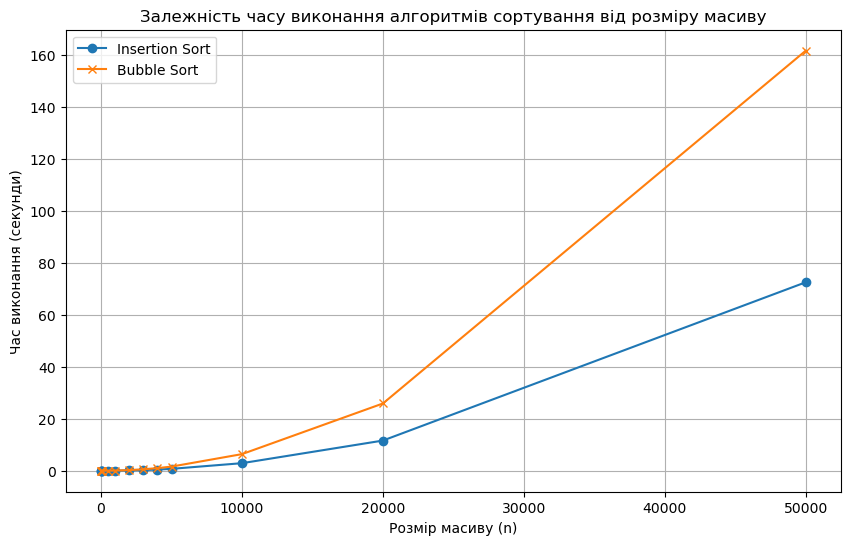

Час виконання сортування вставками: [4.76837158203125e-06, 6.198883056640625e-06, 6.67572021484375e-05, 0.00029969215393066406, 0.006643533706665039, 0.028042316436767578, 0.11168336868286133, 0.25630640983581543, 0.4512655735015869, 0.7227790355682373, 2.89894700050354, 11.595146894454956, 72.43847250938416]
Час виконання бульбашкового сортування: [4.291534423828125e-06, 8.58306884765625e-06, 0.00012803077697753906, 0.0004818439483642578, 0.013018131256103516, 0.057576894760131836, 0.24694561958312988, 0.5573530197143555, 1.0010614395141602, 1.5835795402526855, 6.382562875747681, 25.849690675735474, 161.45576071739197]


In [6]:
import time
import random
import matplotlib.pyplot as plt

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

n_values = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000]
time_insert = []
time_bubble = []

for n in n_values:
    arr = [random.randint(1, 1000) for _ in range(n)]
    arr_copy_insert = arr[:]
    arr_copy_bubble = arr[:]

    # Вимірювання часу сортування вставками
    start_time = time.time()
    insertion_sort(arr_copy_insert)
    end_time = time.time()
    time_insert.append(end_time - start_time)

    # Вимірювання часу бульбашкового сортування
    start_time = time.time()
    bubble_sort(arr_copy_bubble)
    end_time = time.time()
    time_bubble.append(end_time - start_time)

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(n_values, time_insert, marker='o', label='Insertion Sort')
plt.plot(n_values, time_bubble, marker='x', label='Bubble Sort')
plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (секунди)')
plt.title('Залежність часу виконання алгоритмів сортування від розміру масиву')
plt.grid(True)
plt.legend()
plt.show()

print("Час виконання сортування вставками:", time_insert)
print("Час виконання бульбашкового сортування:", time_bubble)

## Аналіз результатів експериментального дослідження часу виконання алгоритмів сортування

При порівнянні часу виконання алгоритмів сортування вставками та бульбашкового сортування на масивах різних розмірів було виявлено наступне:

* Для малих розмірів масивів (n = 5, 10, 50) обидва алгоритми демонструють порівняно невеликий час виконання, і різниця між ними може бути незначною.

* Зі збільшенням розміру масиву спостерігається значне зростання часу виконання для обох алгоритмів, що підтверджує їхню теоретичну квадратичну асимптотичну складність у середньому та найгіршому випадках (O(n^2)).

* Візуальний аналіз графіків показує, що крива часу виконання для бульбашкового сортування, як правило, зростає дещо швидше, ніж для сортування вставками, особливо при великих значеннях n.

* Числові значення часу виконання також підтверджують цю тенденцію. Наприклад, для n = 50000 час виконання бульбашкового сортування значно перевищує час виконання сортування вставками.

Це може бути пов'язано з тим, що, хоча обидва алгоритми мають складність O(n^2), кількість фактичних операцій порівняння та обміну в бульбашковому сортуванні може бути більшою, ніж у сортуванні вставками, особливо в середньому випадку. Оптимізація в бульбашковому сортуванні (перевірка `swapped`) може покращити його продуктивність у найкращому випадку (коли масив вже відсортований), але в нашому експерименті ми використовували випадково згенеровані масиви, тому цей випадок траплявся нечасто.

Таким чином, експериментальні результати в цілому узгоджуються з теоретичною асимптотичною складністю O(n^2) для обох алгоритмів, але також вказують на те, що сортування вставками може бути дещо ефективнішим за бульбашкове сортування на практиці, особливо для більших масивів випадкових даних.

1. O-нотація vs Ω-нотація:
O(f(n)) - верхня межа зростання часу/пам'яті (не повільніше ніж).
Ω(g(n)) - нижня межа зростання часу/пам'яті (не швидше ніж).
2. Складність сортування вставками (найкращий випадок):
O(n). Обґрунтування: для відсортованого масиву кожний елемент порівнюється лише один раз.
3. Ефективний алгоритм:
Алгоритм, що розв'язує задачу за прийнятний (зазвичай поліноміальний) час та обсяг пам'яті залежно від розміру вхідних даних.
4. Головний параметр (розмір) завдання:
Кількісна характеристика вхідних даних, що визначає обсяг роботи алгоритму (наприклад, кількість елементів для сортування).
5. Асимптотична складність F(N) = N^3 + 7N^2 − 14N у O-нотації:
O(N^3) (домінує член найвищого порядку).